# Install pytorch
- https://pytorch.org/

1. Go to anaconda terminal as admin and enter
```bash
conda create --name pytorch_cpu python=3.12
```

2. activate environment

```bash
conda activate pytorch_cpu
```

3. install pytorch
```bash 

# CPU Only Windows and Linux
conda install pytorch==2.5.0 torchvision==0.20.0 torchaudio==2.5.0 cpuonly -c pytorch

# MAC OSX
conda install pytorch==2.5.0 torchvision==0.20.0 torchaudio==2.5.0 -c pytorch

```

4. install additional packages from dslabs and data functions
```bash
conda install pandas scikit-learn matplotlib statsmodels
```

5. if jupyter has errors run

```bash
conda install -n pytorch_cpu ipykernel --update-deps --force-reinstall
```



# DSLabs functions

In [120]:
%run "scripts/dslabs_functions.py"


# Data functions

In [97]:
%run "scripts/data_functions.py"


ModuleNotFoundError: No module named 'seaborn'

In [146]:
import sys
sys.path.append('scripts')

from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_multiline_chart, plot_forecasting_series

# Load

In [147]:

# Function to split the series into train and test sets
def series_train_test_split(series, trn_pct=0.90):
    train_size = int(len(series) * trn_pct)
    train, test = series[:train_size], series[train_size:]
    return train, test
from sklearn.base import RegressorMixin

In [148]:
import pandas as pd
import numpy as np


file_tag = "Gira bike"


# smoothed time series with split. uncomment to use
# train=pd.read_csv(f"data/df_merch_0_2024_agg_time_final_train.csv", decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)
# test=pd.read_csv(f"data/df_merch_0_2024_agg_time_final_test.csv", decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)


# unsmoothed time series with split to test the model. uncomment to use
test_split_threshold = 0.9
data_no_smoothing=pd.read_csv('data/df_gira_agg_2h_diff_input.csv', decimal=".",  index_col='date', parse_dates=True,  infer_datetime_format=True)     
#data_no_smoothing = data_no_smoothing.loc["2022"]
train, test = series_train_test_split(data_no_smoothing, trn_pct=test_split_threshold)

target='target_station_load_rate'


test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 2023-02-14 16:00:00 to 2023-03-31 22:00:00
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   temperature_2m                                               542 non-null    float64
 1   rain_mm                                                      542 non-null    float64
 2   wmo_weather_code                                             542 non-null    float64
 3   wind_speed_10m                                               542 non-null    float64
 4   is_holiday_lisbon                                            542 non-null    float64
 5   target_station_status                                        542 non-null    float64
 6   target_station_load_rate                                     542 non-null    float64
 7   station_load_rate_ Rua do Arco Cego / Av. M

In [135]:
train.head()

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2022-01-01 14:00:00,0.229002,0.0,0.000000,0.048146,0.0,0.0,-0.595851,-0.597770,-0.413569,0.283739,0.034259,-0.177924
2022-01-01 16:00:00,-0.362586,0.0,-0.059009,0.064195,0.0,0.0,-0.486409,0.673013,-1.159614,-0.865405,-0.425792,-0.303518
2022-01-01 18:00:00,-0.534338,0.0,0.059009,0.224681,0.0,0.0,-0.162136,-0.434742,0.689281,-1.014369,-0.210449,0.130827
2022-01-01 20:00:00,-0.019083,0.0,0.000000,0.192584,0.0,0.0,0.000000,0.058523,0.417623,0.443343,0.743912,0.000000
2022-01-01 22:00:00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.497445,-0.085147,0.088669,0.156613,0.172691


In [134]:
test.tail()

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2023-03-31 14:00:00,0.114501,0.0,0.0,-0.320973,0.0,-18.155176,0.283739,0.188109,0.437896,0.354674,0.342591,0.146526
2023-03-31 16:00:00,-0.209918,0.0,0.0,-0.144438,0.0,18.155176,0.052694,-0.673013,-0.077037,0.039014,-0.249602,-0.188390
2023-03-31 18:00:00,-0.400753,0.0,0.0,-0.738238,0.0,0.000000,-0.636385,-0.760798,1.090686,0.315660,-0.851584,0.450043
2023-03-31 20:00:00,-0.438920,0.0,0.0,-0.593801,0.0,0.000000,0.539103,0.836041,-0.616298,-0.929247,-0.141931,0.371547
2023-03-31 22:00:00,-0.248085,0.0,0.0,-0.064195,0.0,0.000000,1.098474,-0.196470,0.000000,0.574572,-0.391533,0.151759


In [117]:
import pandas as pd
import numpy as np


file_tag = "Gira bike"


# smoothed time series with split. uncomment to use
# train=pd.read_csv(f"data/df_merch_0_2024_agg_time_final_train.csv", decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)
# test=pd.read_csv(f"data/df_merch_0_2024_agg_time_final_test.csv", decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)


# unsmoothed time series with split to test the model. uncomment to use
test_split_threshold = 0.9
data_no_smoothing=pd.read_csv('data/df_gira_agg_2h_diff_input.csv', decimal=".",  index_col='date', parse_dates=True,  infer_datetime_format=True)     
train, test = series_train_test_split(data_no_smoothing, trn_pct=test_split_threshold)

target='target_station_load_rate'


test.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 542 entries, 2023-02-14 16:00:00 to 2023-03-31 22:00:00
Series name: temperature_2m
Non-Null Count  Dtype  
--------------  -----  
542 non-null    float64
dtypes: float64(1)
memory usage: 8.5 KB


# LSTM Pytorch Univariate

## Univariate Pytorch Functions and data prep

In [149]:
from torch import no_grad, tensor
from torch.nn import LSTM, Linear, Module, MSELoss
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset


def prepare_dataset_for_lstm_uni(series, seq_length: int = 4):
    setX: list = []
    setY: list = []
    for i in range(len(series) - seq_length):
        past = series[i : i + seq_length]
        future = series[i + 1 : i + seq_length + 1]
        setX.append(past)
        setY.append(future)
    return tensor(setX), tensor(setY)


class DS_LSTM_Univariate(Module):
    def __init__(self, train, input_size: int = 1, hidden_size: int = 50, num_layers: int = 1, length: int = 4):
        super().__init__()
        self.lstm = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.linear = Linear(hidden_size, 1)
        self.optimizer = Adam(self.parameters())
        self.loss_fn = MSELoss()

        trnX, trnY = prepare_dataset_for_lstm_uni(train, seq_length=length)
        self.loader = DataLoader(TensorDataset(trnX, trnY), shuffle=True, batch_size=len(train) // 10)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

    def fit(self):
        self.train()
        for batchX, batchY in self.loader:
            y_pred = self(batchX)
            loss = self.loss_fn(y_pred, batchY)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        return loss

    def predict(self, X):
        with no_grad():
            y_pred = self(X)
        return y_pred[:, -1, :]

In [150]:
from dslabs_functions import HEIGHT, plot_multiline_chart
from copy import deepcopy

from matplotlib.pyplot import figure, savefig, subplots
from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_multiline_chart


def lstm_study_uni(train, test, nr_episodes: int = 1000, sequence_size: list =[2,4,8], nr_hidden_units: list =[25,50,100], measure: str = "R2"):
    # sequence_size = [2, 4, 8]
    # nr_hidden_units = [25, 50, 100]

    step: int = nr_episodes // 10
    episodes = [1] + list(range(0, nr_episodes + 1, step))[1:]
    flag = measure == "R2" or measure == "MAPE"
    best_model = None
    best_params: dict = {"name": "LSTM", "metric": measure, "params": ()}
    best_performance: float = -100000

    _, axs = subplots(1, len(sequence_size), figsize=(len(sequence_size) * HEIGHT, HEIGHT))

    for i in range(len(sequence_size)):
        length = sequence_size[i]
        tstX, tstY = prepare_dataset_for_lstm_uni(test, seq_length=length)

        values = {}
        for hidden in nr_hidden_units:
            yvalues = []
            model = DS_LSTM_Univariate(train, hidden_size=hidden)
            for n in range(0, nr_episodes + 1):
                model.fit()
                if n % step == 0:
                    prd_tst = model.predict(tstX)
                    eval: float = FORECAST_MEASURES[measure](test[length:], prd_tst)
                    print(f"seq length={length} hidden_units={hidden} nr_episodes={n}", eval)
                    if eval > best_performance and abs(eval - best_performance) > DELTA_IMPROVE:
                        best_performance: float = eval
                        best_params["params"] = (length, hidden, n)
                        best_model = deepcopy(model)
                    yvalues.append(eval)
            values[hidden] = yvalues
        plot_multiline_chart(
            episodes,
            values,
            ax=axs[i],
            title=f"LSTM seq length={length} ({measure})",
            xlabel="nr episodes",
            ylabel=measure,
            percentage=flag,
        )
    print(
        f"LSTM best results achieved with length={best_params["params"][0]} hidden_units={best_params["params"][1]} and nr_episodes={best_params["params"][2]}) ==> measure={best_performance:.2f}"
    )
    return best_model, best_params



## Univariate Pytorch Study

seq length=1 hidden_units=5 nr_episodes=0 -0.07893264293670654
seq length=1 hidden_units=5 nr_episodes=1 -0.06663870811462402
seq length=1 hidden_units=5 nr_episodes=2 -0.05591297149658203
seq length=1 hidden_units=5 nr_episodes=3 -0.04729461669921875
seq length=1 hidden_units=5 nr_episodes=4 -0.039575815200805664
seq length=1 hidden_units=5 nr_episodes=5 -0.0337984561920166
seq length=1 hidden_units=5 nr_episodes=6 -0.029557108879089355
seq length=1 hidden_units=5 nr_episodes=7 -0.02619349956512451
seq length=1 hidden_units=5 nr_episodes=8 -0.023698091506958008
seq length=1 hidden_units=5 nr_episodes=9 -0.02168583869934082
seq length=1 hidden_units=5 nr_episodes=10 -0.01996469497680664
seq length=1 hidden_units=15 nr_episodes=0 -0.004986166954040527
seq length=1 hidden_units=15 nr_episodes=1 -0.004984736442565918
seq length=1 hidden_units=15 nr_episodes=2 -0.003252863883972168
seq length=1 hidden_units=15 nr_episodes=3 -0.002127408981323242
seq length=1 hidden_units=15 nr_episodes=4 -

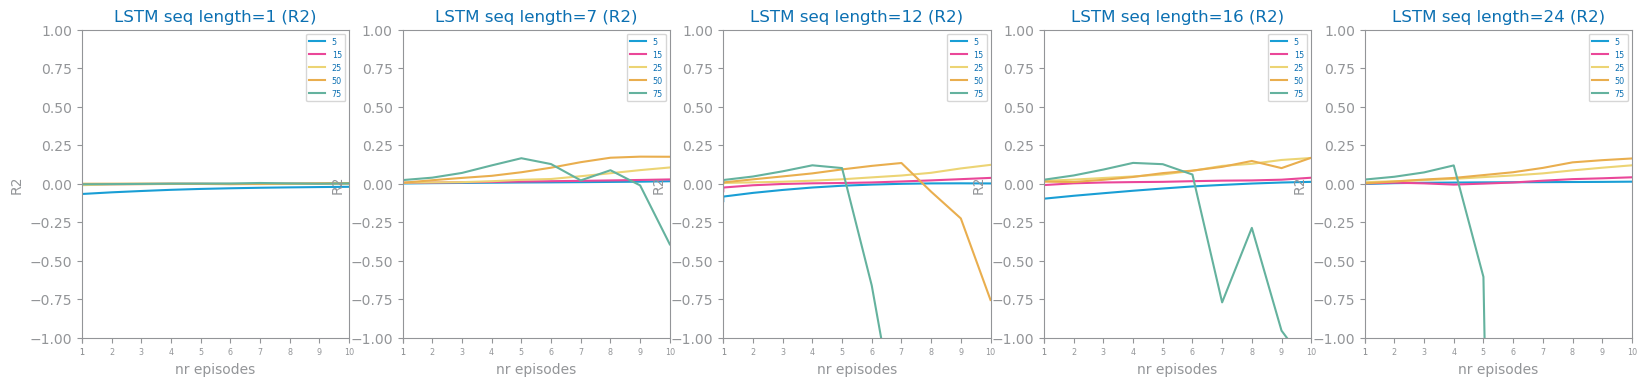

In [158]:
# # Prepare the training and testing data using the time index as the feature
from numpy import arange


train_series_float = train[[target]].values.astype("float32")
test_series_float = test[[target]].values.astype("float32")


best_model, best_params = lstm_study_uni(train_series_float,
                                         test_series_float,
                                         nr_episodes=10,
                                         sequence_size=[1,7,12,16,24],
                                         nr_hidden_units=[5,15,25,50,75],
                                         measure='R2')

## Univariate Pytorch eval

In [159]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from dslabs_functions import plot_multibar_chart


def plot_single_model_evaluation(train: Series, test: Series, prd_train: Series, prd_test: Series, title: str = ""):
    # Drop NaN values from the input series
    # train = train.dropna()
    # test = test.dropna()
    # prd_train = prd_train.dropna()
    # prd_test = prd_test.dropna()      
    
    # Calculate performance metrics
    metrics = {
        "MAE": [
            mean_absolute_error(train, prd_train),
            mean_absolute_error(test, prd_test),
        ],
        "MSE": [
            mean_squared_error(train, prd_train),
            mean_squared_error(test, prd_test),
        ],
        "RMSE": [
            np.sqrt(mean_squared_error(train, prd_train)),
            np.sqrt(mean_squared_error(test, prd_test)),
        ],
        "R²": [
            r2_score(train, prd_train),
            r2_score(test, prd_test),
        ]
    }

    # Create a DataFrame from the metrics dictionary
    performance_df = pd.DataFrame(metrics, index=["Train", "Test"]).T
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(title, fontsize=16)
    
    # Plot scale-dependent errors
    scale_dependent_errors = ["MAE", "MSE", "RMSE"]
    scale_dependent_data = performance_df.loc[scale_dependent_errors]
    ax = axs[0]
    ax.set_title("Scale-dependent errors")
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    bar_width = 0.2  # Adjusted bar width for more spacing
    index = np.arange(len(scale_dependent_data.columns))
    for i, metric in enumerate(scale_dependent_data.index):
        bars = ax.bar(index + i * bar_width * 1.5, scale_dependent_data.loc[metric], bar_width, label=metric)
        ax.bar_label(bars, fmt='%.2f')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(scale_dependent_data.columns)
    ax.legend()
    
    # Plot percentage errors
    percentage_errors = ["R²"]
    percentage_data = performance_df.loc[percentage_errors]
    ax = axs[1]
    ax.set_title("Percentage errors")
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    bar_width = 0.35
    index = np.arange(len(percentage_data.columns))
    for i, metric in enumerate(percentage_data.index):
        bars = ax.bar(index + i * bar_width, percentage_data.loc[metric], bar_width, label=metric)
        ax.bar_label(bars, fmt='%.2f')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(percentage_data.columns)
    ax.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [69]:
train.shape

(3793, 12)

In [70]:
test.shape

(1627, 12)

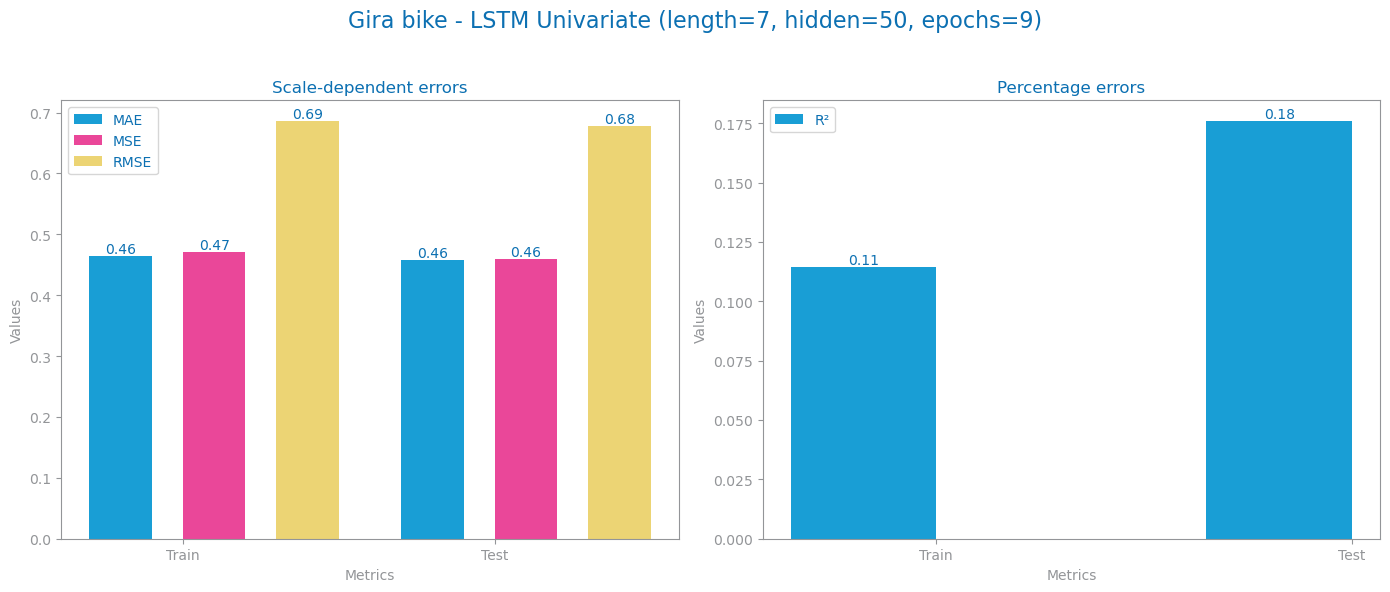

In [160]:

params = best_params["params"]
best_length = params[0]


# Assuming train and test are DataFrames with a DateTime index
trn_series = train[[target]]
tst_series = test[[target]]


trnX, trnY = prepare_dataset_for_lstm_uni(trn_series.values.astype("float32"), seq_length=best_length)
tstX, tstY  = prepare_dataset_for_lstm_uni(tst_series.values.astype("float32"), seq_length=best_length)


prd_trn = best_model.predict(trnX)
prd_tst = best_model.predict(tstX)

# Plot the forecasting evaluation
plot_single_model_evaluation(trn_series[best_length:], tst_series[best_length:], prd_trn, prd_tst, title=f"{file_tag} - LSTM Univariate (length={best_length}, hidden={params[1]}, epochs={params[2]})")


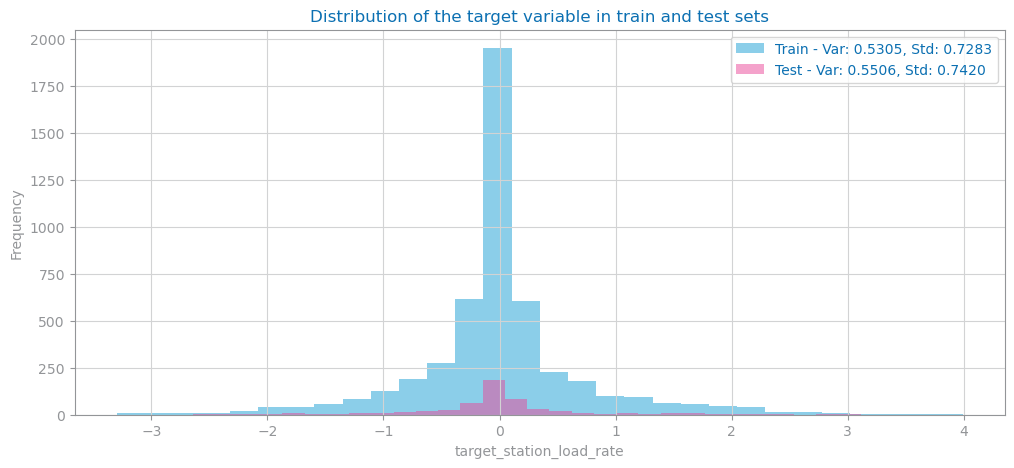

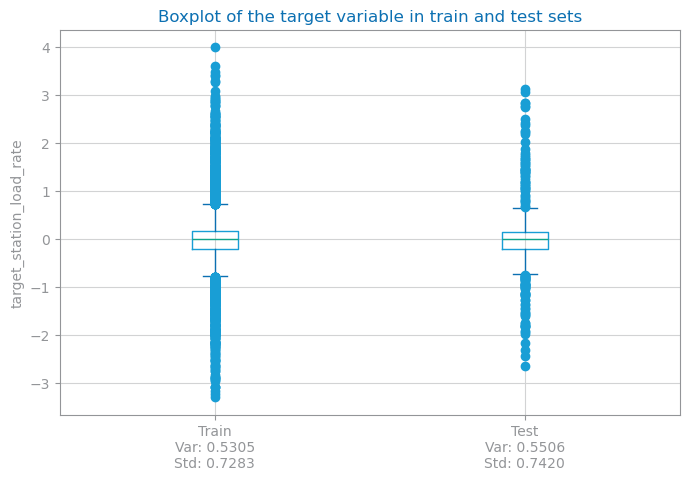

In [161]:
import matplotlib.pyplot as plt

# Variance and Standard Deviation
train_var = train[target].var()
test_var = test[target].var()
train_std = train[target].std()
test_std = test[target].std()

# Histogram
plt.figure(figsize=(12, 5))
plt.hist(train[target], bins=30, alpha=0.5, label=f'Train - Var: {train_var:.4f}, Std: {train_std:.4f}')
plt.hist(test[target], bins=30, alpha=0.5, label=f'Test - Var: {test_var:.4f}, Std: {test_std:.4f}')
plt.xlabel(target)
plt.ylabel("Frequency")
plt.title("Distribution of the target variable in train and test sets")
plt.legend()
plt.grid()
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
plt.boxplot([train[target], test[target]], labels=[f'Train\nVar: {train_var:.4f}\nStd: {train_std:.4f}', 
                                                  f'Test\nVar: {test_var:.4f}\nStd: {test_std:.4f}'])
plt.ylabel(target)
plt.title("Boxplot of the target variable in train and test sets")
plt.grid()
plt.show()


In [19]:
display(trn_series)
display(trnY)
display(prd_trn)

,target_station_load_rate
date,
2022-01-01 14:00:00,-0.595851
2022-01-01 16:00:00,-0.486409
2022-01-01 18:00:00,-0.162136
2022-01-01 20:00:00,0.000000
2022-01-01 22:00:00,0.000000
...,...
2022-12-30 14:00:00,-0.162136
2022-12-30 16:00:00,0.672866
2022-12-30 18:00:00,-0.717453


tensor([[[-0.4864],
         [-0.1621],
         [ 0.0000],
         [ 0.0000],
         [ 0.2716]],

        [[-0.1621],
         [ 0.0000],
         [ 0.0000],
         [ 0.2716],
         [ 0.5391]],

        [[ 0.0000],
         [ 0.0000],
         [ 0.2716],
         [ 0.5391],
         [ 0.0000]],

        ...,

        [[ 0.7823],
         [ 0.0284],
         [-0.1621],
         [ 0.6729],
         [-0.7175]],

        [[ 0.0284],
         [-0.1621],
         [ 0.6729],
         [-0.7175],
         [-0.2959]],

        [[-0.1621],
         [ 0.6729],
         [-0.7175],
         [-0.2959],
         [ 0.0770]]])

tensor([[ 0.2655],
        [ 0.2844],
        [ 0.2096],
        ...,
        [-0.0142],
        [-0.1319],
        [ 0.1031]])

In [20]:
display(tst_series)
display(tstY)
display(prd_tst)

,target_station_load_rate
date,
2022-12-31 00:00:00,-0.101335
2022-12-31 02:00:00,-0.121602
2022-12-31 04:00:00,0.000000
2022-12-31 06:00:00,0.000000
2022-12-31 08:00:00,0.000000
...,...
2023-03-31 14:00:00,0.283739
2023-03-31 16:00:00,0.052694
2023-03-31 18:00:00,-0.636385


tensor([[[-0.1216],
         [ 0.0000],
         [ 0.0000],
         [ 0.0000],
         [ 0.1500]],

        [[ 0.0000],
         [ 0.0000],
         [ 0.0000],
         [ 0.1500],
         [-0.1500]],

        [[ 0.0000],
         [ 0.0000],
         [ 0.1500],
         [-0.1500],
         [ 0.0000]],

        ...,

        [[ 0.3689],
         [-0.5067],
         [ 0.2837],
         [ 0.0527],
         [-0.6364]],

        [[-0.5067],
         [ 0.2837],
         [ 0.0527],
         [-0.6364],
         [ 0.5391]],

        [[ 0.2837],
         [ 0.0527],
         [-0.6364],
         [ 0.5391],
         [ 1.0985]]])

tensor([[0.2199],
        [0.2173],
        [0.1689],
        ...,
        [0.1666],
        [0.0971],
        [0.2448]])

In [ ]:
prd_trn

In [15]:
prd_tst

tensor([[0.2199],
        [0.2173],
        [0.1689],
        ...,
        [0.1666],
        [0.0971],
        [0.2448]])

,target_station_load_rate
date,
2022-01-01 14:00:00,-0.595851
2022-01-01 16:00:00,-0.486409
2022-01-01 18:00:00,-0.162136
2022-01-01 20:00:00,0.000000
2022-01-01 22:00:00,0.000000
...,...
2022-12-30 14:00:00,-0.162136
2022-12-30 16:00:00,0.672866
2022-12-30 18:00:00,-0.717453


In [17]:
tst_series

,target_station_load_rate
date,
2022-12-31 00:00:00,-0.101335
2022-12-31 02:00:00,-0.121602
2022-12-31 04:00:00,0.000000
2022-12-31 06:00:00,0.000000
2022-12-31 08:00:00,0.000000
...,...
2023-03-31 14:00:00,0.283739
2023-03-31 16:00:00,0.052694
2023-03-31 18:00:00,-0.636385


## Plot lstm tensorflow model univariate

<Axes: xlabel='Date', ylabel='target_station_load_rate'>

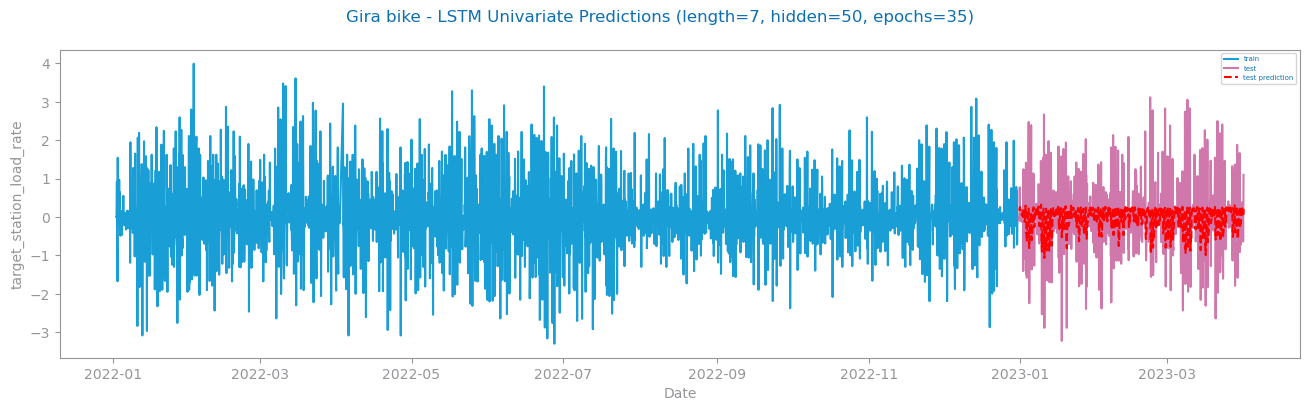

In [142]:
from pandas import Series
pred_series = Series(prd_tst.numpy().ravel(), index=tst_series.index[best_length:])


plot_forecasting_series(
    trn_series[best_length:],
    tst_series[best_length:],
    pred_series,
    title=f"{file_tag} - LSTM Univariate Predictions (length={best_length}, hidden={params[1]}, epochs={params[2]})",
    xlabel='Date',
    ylabel=target,
)

## Pytorch Univariate Model and Loss

In [22]:
model = DS_LSTM_Univariate(train_series_float, input_size=train_series_float.shape[1], hidden_size=50, num_layers=1)
loss = model.fit()
print(loss)

tensor(0.4712, grad_fn=<MseLossBackward0>)


# LSTM Pytorch Multivariate

## Pytorch Multivariate Functions

In [143]:
from torch import no_grad, tensor
from torch.nn import LSTM, Linear, Module, MSELoss
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

def prepare_dataset_for_lstm_multi(features, target, seq_length: int = 4):
    setX: list = []
    setY: list = []
    for i in range(len(target) - seq_length):
        past = features[i : i + seq_length]
        future = target[i + seq_length]  # Predict the next value only
        setX.append(past)
        setY.append(future)
    setX = tensor(np.array(setX, dtype=np.float32))  # Convert to torch.float32
    setY = tensor(np.array(setY, dtype=np.float32)).view(-1, 1)  # Convert to torch.float32 and reshape
    return setX, setY


class DS_LSTM_Multivariate(Module):
    def __init__(self, trainX, trainY, input_size: int, hidden_size: int = 50, num_layers: int = 1, length: int = 4):
        super().__init__()
        self.lstm = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.linear = Linear(hidden_size, 1)
        self.optimizer = Adam(self.parameters())
        self.loss_fn = MSELoss()

        trnX, trnY = prepare_dataset_for_lstm_multi(trainX, trainY, seq_length=length)
        self.loader = DataLoader(TensorDataset(trnX, trnY), shuffle=True, batch_size=len(trainX) // 10)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x[:, -1, :])  # Use the last output of the LSTM
        return x

    def fit(self):
        self.train()
        for batchX, batchY in self.loader:
            y_pred = self(batchX)
            loss = self.loss_fn(y_pred, batchY)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        return loss

    def predict(self, X):
        with no_grad():
            y_pred = self(X)
        return y_pred

from dslabs_functions import HEIGHT, plot_multiline_chart
from copy import deepcopy
from matplotlib.pyplot import figure, savefig, subplots
from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_multiline_chart

def lstm_study_multi(trainX, trainY, testX, testY, nr_episodes: int = 1000,sequence_size: list =[2,4,8], nr_hidden_units: list =[25,50,100], measure: str = "R2"):
    # sequence_size = [2, 4, 8]
    # nr_hidden_units = [25, 50, 100]

    step: int = nr_episodes // 10
    episodes = [1] + list(range(0, nr_episodes + 1, step))[1:]
    flag = measure == "R2" or measure == "MAPE"
    best_model = None
    best_params: dict = {"name": "LSTM", "metric": measure, "params": ()}
    best_performance: float = -100000

    _, axs = subplots(1, len(sequence_size), figsize=(len(sequence_size) * HEIGHT, HEIGHT))

    for i in range(len(sequence_size)):
        length = sequence_size[i]
        tstX, tstY = prepare_dataset_for_lstm_multi(testX, testY, seq_length=length)

        values = {}
        for hidden in nr_hidden_units:
            yvalues = []
            model = DS_LSTM_Multivariate(trainX, trainY, input_size=trainX.shape[1], hidden_size=hidden, length=length)
            for n in range(0, nr_episodes + 1):
                model.fit()
                if n % step == 0:
                    prd_tst = model.predict(tstX)
                    eval: float = FORECAST_MEASURES[measure](testY[length:], prd_tst)
                    print(f"seq length={length} hidden_units={hidden} nr_episodes={n}", eval)
                    if eval > best_performance and abs(eval - best_performance) > DELTA_IMPROVE:
                        best_performance: float = eval
                        best_params["params"] = (length, hidden, n)
                        best_model = deepcopy(model)
                    yvalues.append(eval)
            values[hidden] = yvalues
        plot_multiline_chart(
            episodes,
            values,
            ax=axs[i],
            title=f"LSTM seq length={length} ({measure})",
            xlabel="nr episodes",
            ylabel=measure,
            percentage=flag,
        )
    print(
        f"LSTM best results achieved with length={best_params['params'][0]} hidden_units={best_params['params'][1]} and nr_episodes={best_params['params'][2]}) ==> measure={best_performance:.2f}"
    )
    return best_model, best_params


## Pytorch Multivariate Data Study

In [144]:

# unsmoothed time series with split to test the model. uncomment to use
test_split_threshold = 0.9
data_no_smoothing=pd.read_csv('data/df_gira_agg_2h_diff_input.csv', decimal=".",  index_col='date', parse_dates=True,  infer_datetime_format=True)     
train, test = series_train_test_split(data_no_smoothing, trn_pct=test_split_threshold)

target='target_station_load_rate'

seq length=5 hidden_units=5 nr_episodes=0 -0.08597612380981445
seq length=5 hidden_units=5 nr_episodes=5 -0.02810823917388916
seq length=5 hidden_units=5 nr_episodes=10 0.0007958412170410156
seq length=5 hidden_units=5 nr_episodes=15 0.01403951644897461
seq length=5 hidden_units=5 nr_episodes=20 0.02583712339401245
seq length=5 hidden_units=5 nr_episodes=25 0.04488128423690796
seq length=5 hidden_units=5 nr_episodes=30 0.07086902856826782
seq length=5 hidden_units=5 nr_episodes=35 0.10825479030609131
seq length=5 hidden_units=5 nr_episodes=40 0.1488383412361145
seq length=5 hidden_units=5 nr_episodes=45 0.1822136640548706
seq length=5 hidden_units=5 nr_episodes=50 0.187871515750885
seq length=5 hidden_units=15 nr_episodes=0 -0.06410372257232666
seq length=5 hidden_units=15 nr_episodes=5 0.01968461275100708
seq length=5 hidden_units=15 nr_episodes=10 0.05136758089065552
seq length=5 hidden_units=15 nr_episodes=15 0.1019778847694397
seq length=5 hidden_units=15 nr_episodes=20 0.155234098

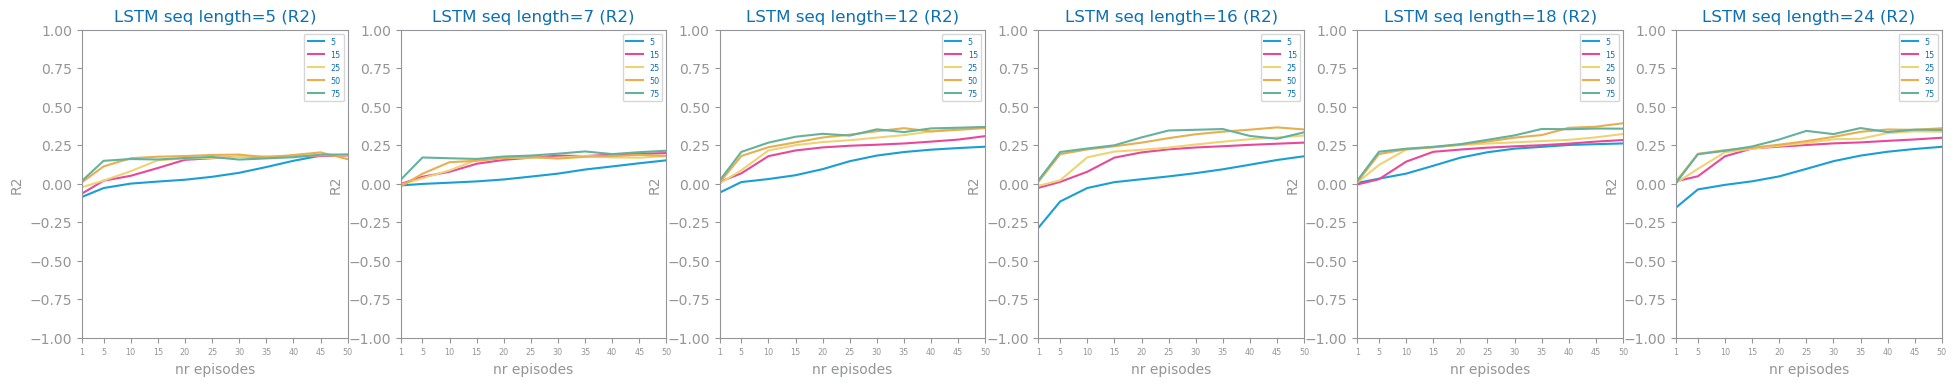

In [145]:

trnY_float = train.pop(target).values.astype(np.float32)
tstY_float = test.pop(target).values.astype(np.float32)
trnX_float = train.values.astype(np.float32)
tstX_float = test.values.astype(np.float32)

# Run the study
best_model, best_params = lstm_study_multi(trnX_float,
                                            trnY_float,
                                            tstX_float,
                                            tstY_float,
                                            nr_episodes=50,
                                            sequence_size=[5,7,12,16,18,24],
                                            nr_hidden_units=[5,15,25,50,75],
                                            measure='R2')



## Pytorch Multivariate Model Evaluation

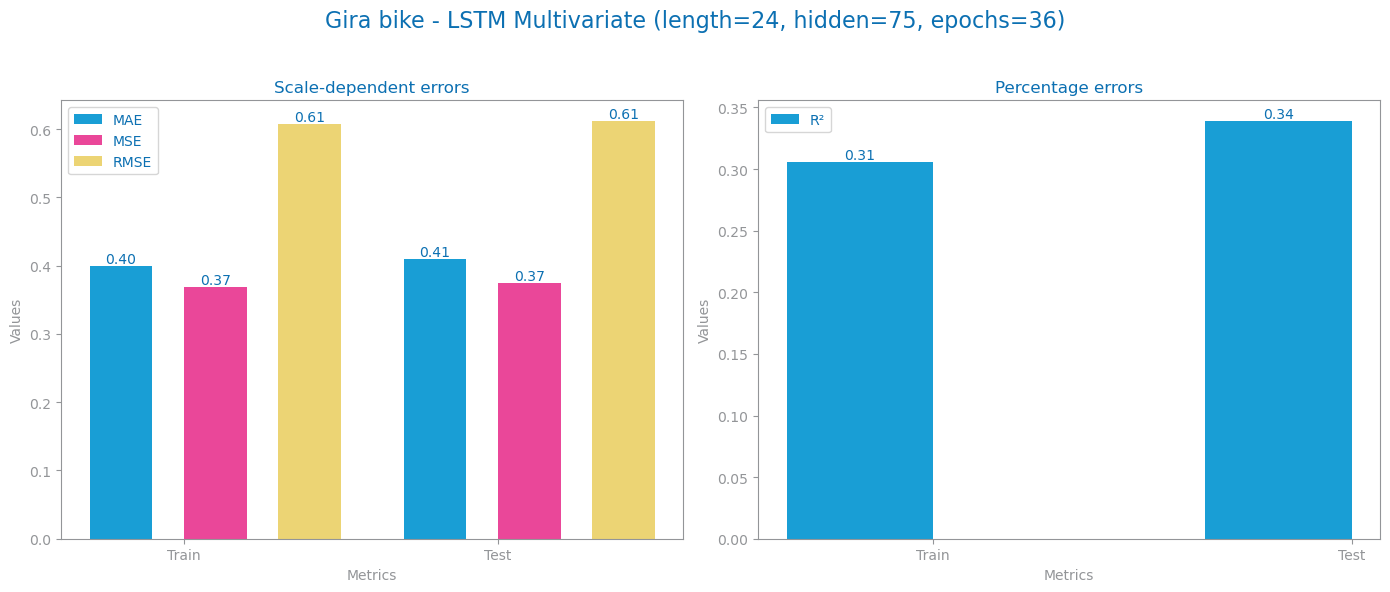

<Figure size 640x480 with 0 Axes>

In [34]:

params = best_params["params"]
best_length = params[0]


train=pd.read_csv(f"data/df_gira_agg_2h_final_train.csv", decimal=".",  index_col='date', parse_dates=True,  infer_datetime_format=True)
test=pd.read_csv(f"data/df_gira_agg_2h_final_test.csv", decimal=".",  index_col='date', parse_dates=True,  infer_datetime_format=True)



# Assuming `train` and `test` are your DataFrames and `target` is the target column name
trnY_float = train.pop(target).values.astype(np.float32)
tstY_float = test.pop(target).values.astype(np.float32)
trnX_float = train.values.astype(np.float32)
tstX_float = test.values.astype(np.float32)


trnX, trnY = prepare_dataset_for_lstm_multi(trnX_float, trnY_float, seq_length=best_length)
tstX, tstY  = prepare_dataset_for_lstm_multi(tstX_float, tstY_float, seq_length=best_length)


prd_trn = best_model.predict(trnX)
prd_tst = best_model.predict(tstX)


# Assuming train and test are DataFrames with a DateTime index
# Reconstruct the series for plotting
train[target] = trnY_float
test[target] = tstY_float
trn_series = train[[target]]
tst_series = test[[target]]


# Plot the forecasting evaluation
plot_single_model_evaluation(trn_series[best_length:], tst_series[best_length:], prd_trn, prd_tst, title=f"{file_tag} - LSTM Multivariate (length={best_length}, hidden={params[1]}, epochs={params[2]})")
savefig(f"images/{file_tag}_LSTM_multivariate_predictions.png")

## Pytorch Multivariate Plots

<Axes: xlabel='Date', ylabel='target_station_load_rate'>

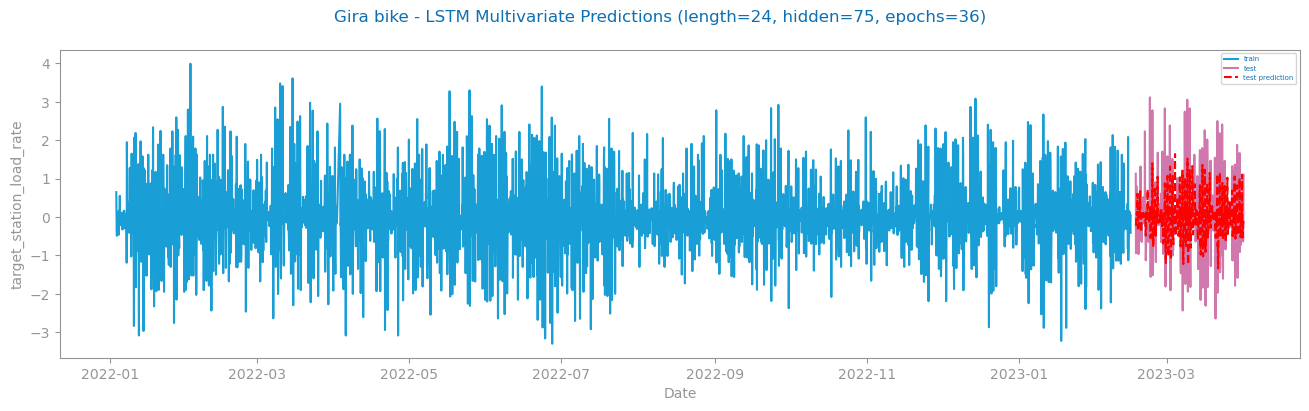

In [35]:
from pandas import Series
pred_series = Series(prd_tst.numpy().ravel(), index=tst_series.index[best_length:])


plot_forecasting_series(
    trn_series[best_length:],
    tst_series[best_length:],
    pred_series,
    title=f"{file_tag} - LSTM Multivariate Predictions (length={best_length}, hidden={params[1]}, epochs={params[2]})",
    xlabel='Date',
    ylabel=target,
)

In [ ]:
import matplotlib.pyplot as plt

# Variance and Standard Deviation
train_var = train[target].var()
test_var = test[target].var()
train_std = train[target].std()
test_std = test[target].std()

# Histogram
plt.figure(figsize=(12, 5))
plt.hist(train[target], bins=30, alpha=0.5, label=f'Train - Var: {train_var:.4f}, Std: {train_std:.4f}')
plt.hist(test[target], bins=30, alpha=0.5, label=f'Test - Var: {test_var:.4f}, Std: {test_std:.4f}')
plt.xlabel(target)
plt.ylabel("Frequency")
plt.title("Distribution of the target variable in train and test sets")
plt.legend()
plt.grid()
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
plt.boxplot([train[target], test[target]], labels=[f'Train\nVar: {train_var:.4f}\nStd: {train_std:.4f}', 
                                                  f'Test\nVar: {test_var:.4f}\nStd: {test_std:.4f}'])
plt.ylabel(target)
plt.title("Boxplot of the target variable in train and test sets")
plt.grid()
plt.show()

## Pytorch Multivariate Model and Loss

In [42]:
model = DS_LSTM_Multivariate(trnX_float, trnY_float, input_size=trnX_float.shape[1], hidden_size=50, num_layers=1)
loss = model.fit()
print(loss)

tensor(0.0945, grad_fn=<MseLossBackward0>)
